# reading

In [1]:
# fname = '/Volumes/USB128GB/planet4/2016-05-29_planet_four_classifications.csv'
fname = '/Volumes/USB128GB/planet4/APF0000bvc.csv'
fname = '/Users/klay6683/local_data/2016-11-21_planet_four_classifications.csv'

## dask

In [23]:
import dask.dataframe as dd

In [31]:
df = dd.read_csv(fname, na_values=['null'])

In [33]:
df.groupby(df.marking).angle.agg([np.min, np.max]).compute()

TypeError: unorderable types: str() >= float()

Traceback
---------
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/dask/async.py", line 268, in execute_task
    result = _execute_task(task, data)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/dask/async.py", line 249, in _execute_task
    return func(*args2)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/dask/compatibility.py", line 47, in apply
    return func(*args, **kwargs)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/dask/dataframe/groupby.py", line 406, in _groupby_apply_funcs
    result[result_column] = func(grouped, **func_kwargs)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/dask/dataframe/groupby.py", line 428, in _apply_func_to_column
    return func(df_like[column])
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/dask/utils.py", line 879, in __call__
    return getattr(obj, self.method)(*args, **kwargs)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/groupby.py", line 118, in f
    result = self.aggregate(lambda x: npfunc(x, axis=self.axis))
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/groupby.py", line 2658, in aggregate
    result = self._aggregate_named(func_or_funcs, *args, **kwargs)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/groupby.py", line 2776, in _aggregate_named
    output = func(group, *args, **kwargs)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/groupby.py", line 118, in <lambda>
    result = self.aggregate(lambda x: npfunc(x, axis=self.axis))
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/numpy/core/fromnumeric.py", line 2294, in amax
    return amax(axis=axis, out=out, **kwargs)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/generic.py", line 5625, in stat_func
    numeric_only=numeric_only)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/series.py", line 2318, in _reduce
    return op(delegate, skipna=skipna, **kwds)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/nanops.py", line 109, in f
    result = alt(values, axis=axis, skipna=skipna, **kwds)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/pandas/core/nanops.py", line 446, in reduction
    result = getattr(values, meth)(axis)
  File "/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/numpy/core/_methods.py", line 26, in _amax
    return umr_maximum(a, axis, None, out, keepdims)


## astropy tables

In [14]:
from astropy.io import ascii

In [15]:
ascii.read(fname)

classification_id,created_at,image_id,image_name,image_url,user_name,marking,x_tile,y_tile,acquisition_date,local_mars_time,x,y,image_x,image_y,radius_1,radius_2,distance,angle,spread,version,user_agent
str24,str23,str10,str15,str72,str9,str11,int64,int64,str10,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str120
50ea1eae45d7e11332000bf9,2013-01-07 01:02:38 UTC,APF00004hc,ESP_012264_0980,http://www.planetfour.org/subjects/standard/50e73dda5e2ed212400016b0.jpg,brian-c,interesting,5,84,2009-03-09,4:51 PM,415.5,317.0,3375.5,45801.0,--,--,--,--,--,--,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.7; rv:17.0) Gecko/20100101 Firefox/17.0
50ea21c245d7e11332000c88,2013-01-07 01:15:46 UTC,APF00002rq,ESP_011544_0985,http://www.planetfour.org/subjects/standard/50e73ce45e2ed21240000e06.jpg,arfon,blotch,2,10,2009-01-12,5:14 PM,278.5,145.0,1018.5,5077.0,186.657440248,77.0064932327,--,142.386043151,--,--,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.101 Safari/537.11"
50ea21d7e3995601cb00016d,2013-01-07 01:16:07 UTC,APF0000cwl,ESP_012079_0945,http://www.planetfour.org/subjects/standard/50e742d05e2ed21240004155.jpg,arfon,fan,5,35,2009-02-22,6:04 PM,295.5,366.0,3255.5,18998.0,--,--,280.264161105,-162.987453191,23.0505733465,1,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.101 Safari/537.11"
50ea21d7e3995601cb00016d,2013-01-07 01:16:07 UTC,APF0000cwl,ESP_012079_0945,http://www.planetfour.org/subjects/standard/50e742d05e2ed21240004155.jpg,arfon,fan,5,35,2009-02-22,6:04 PM,294.5,371.0,3254.5,19003.0,--,--,195.13328778,-96.1780649021,14.329917106,1,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.101 Safari/537.11"
50ea21e745d7e11332000c97,2013-01-07 01:16:23 UTC,APF0000jn4,ESP_021684_0985,http://www.planetfour.org/subjects/standard/50e73bda5e2ed211dc0006c5.jpg,arfon,blotch,2,127,2011-03-13,4:08 PM,314.5,589.0,1054.5,69637.0,44.4072066223,33.3054049668,--,35.8376529543,--,--,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.101 Safari/537.11"
50ea21e745d7e11332000c97,2013-01-07 01:16:23 UTC,APF0000jn4,ESP_021684_0985,http://www.planetfour.org/subjects/standard/50e73bda5e2ed211dc0006c5.jpg,arfon,blotch,2,127,2011-03-13,4:08 PM,43.5,199.0,783.5,69247.0,23.0,17.25,--,90.0,--,--,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.101 Safari/537.11"
50ea21e745d7e11332000c97,2013-01-07 01:16:23 UTC,APF0000jn4,ESP_021684_0985,http://www.planetfour.org/subjects/standard/50e73bda5e2ed211dc0006c5.jpg,arfon,blotch,2,127,2011-03-13,4:08 PM,71.5,543.0,811.5,69591.0,26.1725046566,19.6293784925,--,43.451842301,--,--,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.101 Safari/537.11"
50eacdcb45d7e143b10002c0,2013-01-07 13:29:47 UTC,APF0000469,ESP_011697_0980,http://www.planetfour.org/subjects/standard/50e73dad5e2ed21240001521.jpg,lukesmith,blotch,2,7,2009-01-23,5:03 PM,459.5,202.0,1199.5,3490.0,24.0831891576,10.0,--,41.6335393366,--,--,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:17.0) Gecko/20100101 Firefox/17.0
50eacdcb45d7e143b10002c0,2013-01-07 13:29:47 UTC,APF0000469,ESP_011697_0980,http://www.planetfour.org/subjects/standard/50e73dad5e2ed21240001521.jpg,lukesmith,blotch,2,7,2009-01-23,5:03 PM,426.5,509.0,1166.5,3797.0,15.5563491861,10.0,--,45.0,--,--,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:17.0) Gecko/20100101 Firefox/17.0


In [5]:
data['classification_id']

50ea1eae45d7e11332000bf9
50ea21c245d7e11332000c88
50ea21d7e3995601cb00016d
50ea21d7e3995601cb00016d
50ea21e745d7e11332000c97
50ea21e745d7e11332000c97
50ea21e745d7e11332000c97
50eacdcb45d7e143b10002c0
50eacdcb45d7e143b10002c0


## pandas

In [2]:
from planet4 import io, reduction

In [122]:
reader = pd.read_csv(fname, chunksize=1e6, na_values=['null'], 
                     usecols=reduction.analysis_cols)

In [3]:
df = pd.read_csv(fname, chunksize=None, na_values=['null'], 
                     usecols=reduction.analysis_cols, nrows=2e4, engine='c')

In [4]:
pd.concat?

In [5]:
data = [chunk for chunk in reader]

In [6]:
df = pd.concat(data, ignore_index=True)

TypeError: cannot concatenate a non-NDFrame object

In [7]:
type(data)

list

In [125]:
df.to_csv('bvc.csv', index=False)

In [106]:
data = 0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 21 columns):
classification_id    235 non-null object
created_at           235 non-null object
image_id             235 non-null object
image_name           235 non-null object
image_url            235 non-null object
user_name            235 non-null object
marking              235 non-null object
x_tile               235 non-null int64
y_tile               235 non-null int64
acquisition_date     235 non-null object
local_mars_time      235 non-null object
x                    175 non-null float64
y                    175 non-null float64
image_x              175 non-null float64
image_y              175 non-null float64
radius_1             58 non-null float64
radius_2             58 non-null float64
distance             101 non-null float64
angle                159 non-null float64
spread               101 non-null float64
version              101 non-null float64
dtypes: float64(10), int64(2

In [108]:
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth',100)

In [109]:
blotches = df[df.marking=='blotch']

In [110]:
from planet4 import markings

In [111]:
p4id = markings.ImageID('bvc', scope='planet4')

In [112]:
delta = 25
q = "{} < x < {} and {} < y < {}".format(-delta, markings.img_x_size + delta,
                                         -delta, markings.img_y_size + delta)
blotches = blotches.query(q)


In [113]:
def normalize_blotch_angles(df):
    data = df.copy()
    idx = data.radius_1 < data.radius_2
    col_orig = ['radius_1','radius_2']
    col_reversed = list(reversed(col_orig))
    data.loc[idx, col_orig] = data.loc[idx, col_reversed].values
    data.loc[idx, 'angle'] += 90
    return data

In [114]:
from planet4.markings import Blotch

In [115]:
blotchcols = Blotch.to_average

In [116]:
normed = normalize_blotch_angles(blotches)

In [117]:
%matplotlib nbagg

In [120]:
q = 'x>240 and x<430 and y>500'
q = 'x<200 and y>350'
q = 'x< 200 and y > 350'
data = normed.query(q)[blotchcols].angle
data

2        3.224523
45       1.958067
68      67.932100
69      91.450216
86      88.531199
88      77.005383
89    -110.409883
90     -84.936383
96    -109.707979
97    -111.104839
110     24.010799
130    -16.587339
164    159.075498
165     11.809883
175    -49.049582
176     16.699244
182     55.954063
188    162.087491
189     10.724449
203      6.775656
207     98.806793
215     84.596209
216     90.000000
225     65.833370
Name: angle, dtype: float64

In [121]:
blotches.query(q)[blotchcols].angle

2        3.224523
45       1.958067
68     -22.067900
69       1.450216
86      -1.468801
88     -12.994617
89    -110.409883
90     -84.936383
96    -109.707979
97    -111.104839
110     24.010799
130    -16.587339
164     69.075498
165     11.809883
175    -49.049582
176     16.699244
182     55.954063
188    162.087491
189     10.724449
203      6.775656
207     98.806793
215     84.596209
216     90.000000
225     65.833370
Name: angle, dtype: float64

<IPython.core.display.Javascript object>


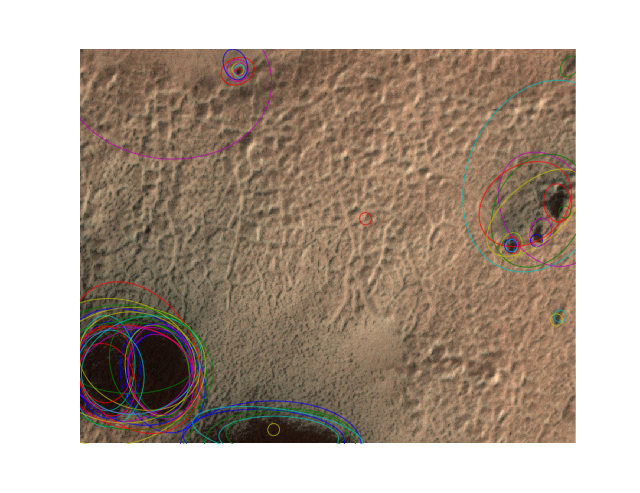

In [94]:
p4id.plot_blotches(blotches=normed)

In [76]:
normalize_blotch_angles(data)

<IPython.core.display.Javascript object>


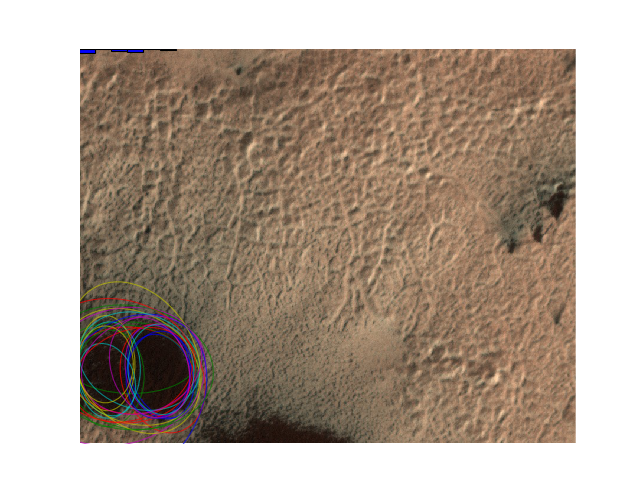

In [77]:
p4id.plot_blotches(blotches=data)

In [15]:
reduction.convert_ellipse_angles(blotches)

INFO: Converting ellipse angles.
INFO: Conversion of ellipse angles done.


In [16]:
blotches.query('x>240 and x<430 and y>500')[blotchcols]

,x,y,image_x,image_y,angle,radius_1,radius_2
18,311.333313,639.0,2531.333313,5571.0,2.436648,137.032843,47.042534
29,336.500000,638.0,2556.500000,5570.0,1.636577,101.400197,35.014283
94,339.000000,644.0,2559.000000,5576.0,178.939088,128.097619,54.009258
125,349.500000,631.0,2569.500000,5563.0,179.438295,102.004902,36.055513
138,328.000000,625.0,2548.000000,5557.0,90.000000,10.000000,10.000000
186,323.000000,651.0,2543.000000,5583.0,179.215175,153.000000,73.006849
205,335.000000,631.0,2555.000000,5563.0,7.516442,145.248064,40.012498


In [ ]:
def func(angle):
    if angle < 0:
        return angle + 180
    elif angle > 180:
        return angle - 180
    else:
        return angle

In [ ]:
df.loc[df.marking == 'blotch', 'angle'] = df.loc[df.marking=='blotch', 'angle'].map(func)

In [ ]:
blotches.angle

In [ ]:
df.to_hdf('debugging_db.hdf', 'df')

In [ ]:
pwd

## reset notebook here to clean up memory.

In [ ]:
from planet4 import reduction
from pathlib import Path

In [ ]:
p = Path('debugging_db.hdf')

In [ ]:
pabs=p.absolute()

In [ ]:
rootpath = pabs.parent / pabs.stem

In [ ]:
rootpath

In [ ]:
df = pd.read_hdf('debugging_db.hdf', 'df')

In [ ]:
reduction.convert_times(df)

In [ ]:
df[df.classification_id=='50ee387194b9d50e88000001']

In [ ]:
df = reduction.splitting_tutorials(rootpath, df)

In [ ]:
df[df.classification_id=='50ee387194b9d50e88000001']

In [ ]:
for marking in ['fan', 'blotch']:
    df = reduction.scan_for_incomplete(df, marking)

In [ ]:
df[df.classification_id=='50ee387194b9d50e88000001']

In [ ]:
reduction.convert_ellipse_angles(df)

In [ ]:
df.to_hdf(str(pabs), 'df', format='table', data_columns=['image_name'])

In [ ]:
ll -arth

In [ ]:
df = pd.read_hdf('debugging_db.hdf')

In [ ]:
df[df.classification_id=='50ee391e2daa4f2c7b000001']

In [ ]:
data = df[df.image_id=='APF0000cqn']

In [ ]:
data[data.classification_id=='50ee391e2daa4f2c7b000001']

In [ ]:
data[data.user_name=='fiona_j'].classification_id.unique()

In [ ]:
data[data.user_name=='fiona_j'].classification_id.unique().min()

In [ ]:
group = data.groupby(['image_id','user_name'], sort=False)

In [ ]:
good_class_ids = group['classification_id'].min()

In [ ]:
cleaned = reduction.remove_duplicates_from_image_name_data(data)

In [ ]:
cleaned[cleaned.user_name=='fiona_j']

In [ ]:
cleaned[cleaned.classification_id=='50ee391e2daa4f2c7b000001']

In [ ]:
cleaned[cleaned.user_name=='fiona_j'][['classification_id','user_name','created_at','image_id']]

In [ ]:
from planet4 import io

In [ ]:
db = io.DBManager()

In [ ]:
db.get_classification_id_data('50ee391e2daa4f2c7b000001')

In [ ]:
cleaned[cleaned.classification_id=='50ee387194b9d50e88000001']

In [ ]:
data[data.classification_id=='50ede17f94b9d509a4000181']

In [ ]:
## reset again

In [ ]:
from planet4 import reduction

In [ ]:
reduction.remove_duplicates_from_file(str(pabs))

# Compare two database files

In [1]:
df = pd.read_hdf("/Users/klay6683/local_data/2016-11-21_planet_four_classifications_queryable_cleaned.h5")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13515922 entries, 0 to 13515921
Data columns (total 21 columns):
classification_id    object
created_at           datetime64[ns]
image_id             object
image_name           object
image_url            object
user_name            object
marking              object
x_tile               int64
y_tile               int64
acquisition_date     datetime64[ns]
local_mars_time      object
x                    float64
y                    float64
image_x              float64
image_y              float64
radius_1             float64
radius_2             float64
distance             float64
angle                float64
spread               float64
version              float64
dtypes: datetime64[ns](2), float64(10), int64(2), object(7)
memory usage: 2.2+ GB


In [1]:
df = pd.read_hdf("/Users/klay6683/local_data/first_result.h5")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13515922 entries, 0 to 13515921
Data columns (total 21 columns):
classification_id    object
created_at           datetime64[ns]
image_id             object
image_name           object
image_url            object
user_name            object
marking              object
x_tile               int64
y_tile               int64
acquisition_date     datetime64[ns]
local_mars_time      object
x                    float64
y                    float64
image_x              float64
image_y              float64
radius_1             float64
radius_2             float64
distance             float64
angle                float64
spread               float64
version              float64
dtypes: datetime64[ns](2), float64(10), int64(2), object(7)
memory usage: 2.2+ GB
